# Morphological Operations on saved model

In [20]:
import sys
sys.path.append('../')

import numpy as np

from MRIsegm.utils import get_slice, get_slice_info, get_rois, make_mask
from MRIsegm.processing import denoise_slice
from MRIsegm.methods import features_extraction, definig_variables, print_metrics, show_model_result, load_model

## Loading data

In [21]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patience = 'BO11/'

# slice
dir_path =  src + patience + 'T2AX'
slice = get_slice(dir_path=dir_path) 
slice = denoise_slice(slice=slice, alpha=6) # denoising
get_slice_info(slice)

# ROIs
roi_path = src + patience + 'T2ROI'
positions, xs, ys = get_rois(roi_path=roi_path) 

The image object has the following dimensions: depth:30, height:512, width:512


## Features exctraction

In [22]:
layer = 14

ksize = np.arange(3, 5, 1)
sigma = np.arange(1, 5, 1)
theta = np.arange(0, 2*np.pi, np.pi/4)
lamb = np.arange(0, 2*np.pi, np.pi/4)
gamma = np.arange(0, 1, 0.2)
psi = np.arange(0, 1, 1)

X = features_extraction(slice=slice, layer=layer, ksize=ksize, sigma=sigma, theta=theta, lamb=lamb, gamma=gamma, psi=psi)

## Loading model

In [23]:
filename = 'tuned_model'
loaded_model = load_model(filename=filename)

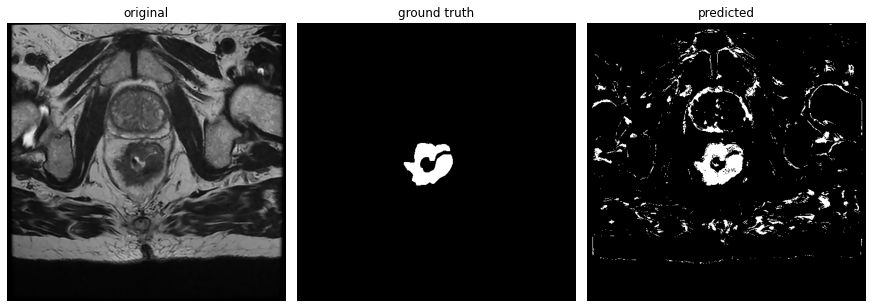

In [24]:
result = loaded_model.predict(X)

predicted = result.reshape(slice.shape[1:3])
ground_truth = make_mask(slice=slice, layer=layer, positions=positions, xs=xs, ys=ys)

show_model_result(ground_truth=ground_truth, predicted=predicted, show_original=True, original=slice[layer, : , :])

## Morphological operations

In [25]:
import cv2

kernel = np.ones((3,3),np.uint8)

### Opening

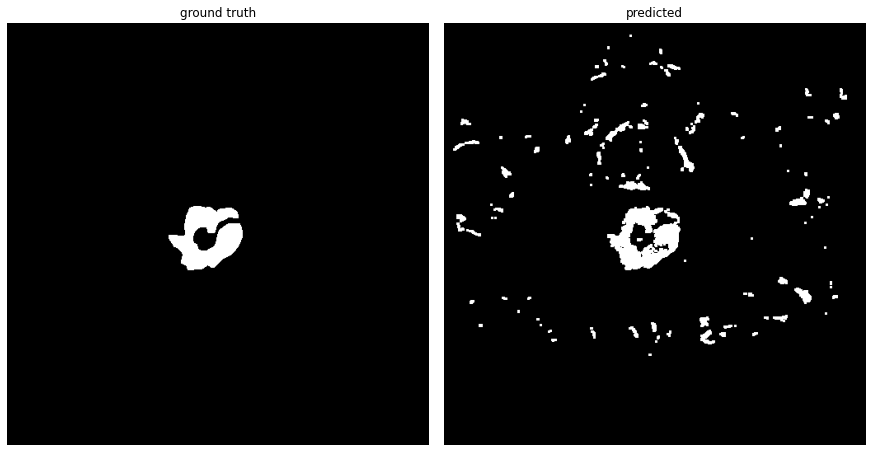

In [26]:
pred_opening = cv2.morphologyEx(predicted, cv2.MORPH_OPEN, kernel, iterations=1)

show_model_result(ground_truth=ground_truth, predicted=pred_opening)

### Erosion

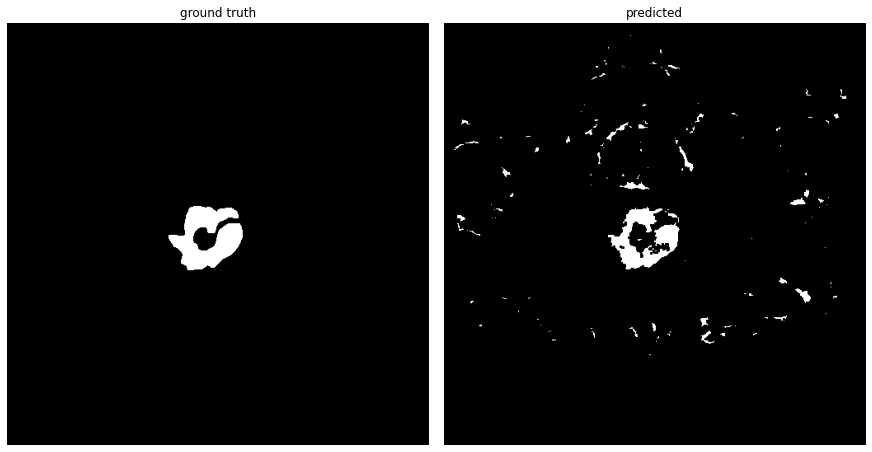

In [27]:
pred_erosion = cv2.erode(predicted,kernel,iterations = 1)

show_model_result(ground_truth=ground_truth, predicted=pred_erosion)

### Gradient

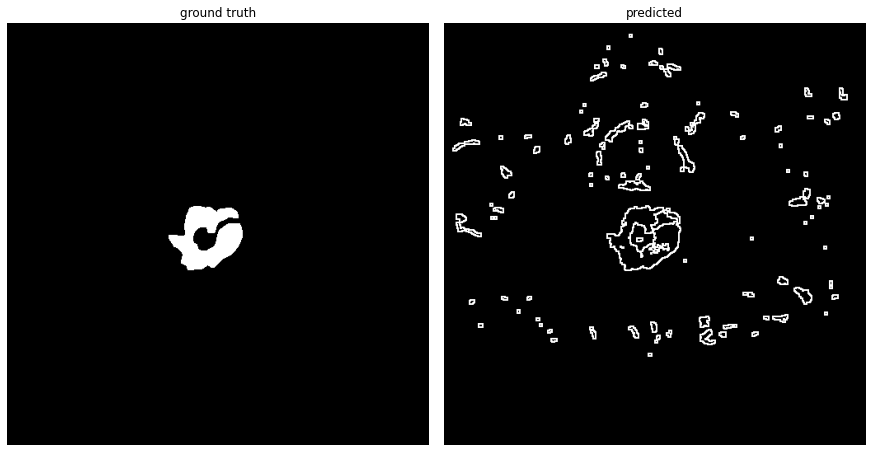

In [28]:
pred_gradient = cv2.morphologyEx(pred_opening, cv2.MORPH_GRADIENT, kernel, iterations = 1)

show_model_result(ground_truth=ground_truth, predicted=pred_gradient)